<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw10_ftcs_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our $\phi(x)$ here is

$$\phi(x) = \cos(\pi x)I_{(-1/2, +1/2)}(x)$$ 

First, graph this. It is simply $\cos(\pi x)$ on the interval (-1/2, 1/2). Import numpy and pyplot.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

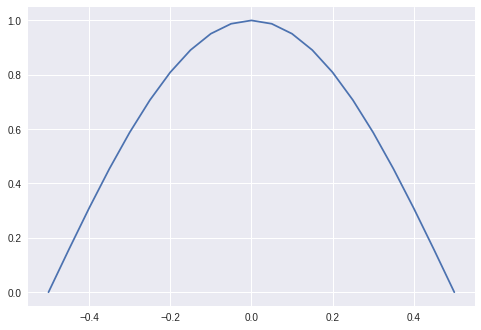

In [0]:
x_range = np.arange(-0.5, 0.55, 0.05)
y_range = np.cos(np.pi * x_range)

plt.plot(x_range,y_range)

#Performing FTCS

Now, perform FTCS with $\Delta x = 0.5, \Delta t = 0.25, n = 1, 2, 3$.

$$u_{0}^{0} = \phi(0) = \cos(0) = 1$$

Our $s$ here is 

$$s = \frac{\theta}{h^{2}} = \frac{dt}{dx^{2}} = \frac{.25}{.5^{2}} = \frac{.25}{.25} = 1$$

Thus, build outwards. Each $\Delta x$ means we consider 3 starting values of $x$: $x = -0.5, 0, 0.5$. Note that for $x = -0.5, 0.5$, the function $\phi(x)$ is 0 because the indicator function is zero at these values (the set is open, not closed). Thus, our first layer of the stencil is

`0 1 0`

For the n = 0 layer. Now, consider the n = 1 layer. 

$$u_{0}^{1} = 1u_{-0.5}^{0} - u_{0}^{0} + u_{0.5}^{0} = 0 - 1 + 0 = -1$$

$$u_{-0.5}^{1} = u_{0.5}^{1} = u_{0}^{0} = 1$$

This second set of equations are 1 because they both have 1 as the coefficient on $u_{0}^{0}$. Thus, the n = 1 layer is

`0 1 -1 1 0`

Now, consider n = 2:

$$u_{0}^{2} = u_{-0.5}^{1} - u_{0}^{1} + u_{0.5}^{1} = 1 - (-1) + 1 = 3$$

$$u_{-0.5}^{2} = -u_{-0.5}^{1} + u_{0}^{1} = -1 + (-1) = -2$$

$$u_{0.5}^{2} = u_{0}^{1} - u_{0.5}^{1} = -1 - 1 = -2$$

$$u_{-1}^{2} = u_{1}^{2} = 1$$

As before, for the same resons. Observe that the layers being formed are symmetric across the central $j = 0$ column. Thus, the n = 2 layer is

`0 1 -2 3 -2 1 0`

Now, consider n = 3:

$$u_{0}^{3} = u_{-0.5}^{2} - u_{0}^{2} + u_{0.5}^{2} = -2 - 3 + (-2) = -7$$

$$u_{-0.5}^{3} = u_{0.5}^{3} = u_{-1}^{2} - u_{-0.5}^{2} + u_{0}^{2} = 1 - (-2) + 3 = 1 + 2 + 3 = 6$$

$$u_{-1}^{3} = u_{1}^{3} = -u_{-1}^{2} + u_{-0.5}^{2} = -1 + (-2) = 3$$

$$u_{-1.5}^{3} = u_{1.5}^{3} = u_{-1}^{2} = 1$$

Thus, this layer is

`0 1 -3 6 -7 6 -3 1 0`

So as a whole our layers appear as follows:

`0  1  -3   6  -7   6  -3  1  0`

`   0   1  -2   3  -2   1  0   `

`       0   1  -1   1   0      `

`           0   1   0          `


(It's formatting weird in post but it's meant to be a triangle like the one from the lecture notes)

From this, we can clearly see the FTCS is instable. The max value in each layer will always occur at $j = 0$, and will increase in size as $n \rightarrow \infty$. Thus, the FTCS is instable.

#Stability with Small $\Delta t$

Now, show that for $\Delta t < 1/8$, the FTCS is stable.

Suppose $\Delta t < 1/8$. Observe that here, the layers should be mirrored once more. This new value for $\Delta t$ yields $s = \frac{dt}{dx^{2}} \leq \frac{0.125}{.25} = \frac{1}{2}$ Thus, $s < 1/2$ and $1 - 2s > 0$, so $u_{j}^{n+1} = su_{j-dx}^{n} + (1-2s)u_{j}^{n} + su_{j+dx}^{n}$ which leads to

$$u_{0}^{0} = 1$$

$$u_{-0.5}^{0} = u_{0.5}^{0} = 0$$

n = 0 layer is the same as in the above scenario, `0 1 0`. Now consider n = 1:

$$u_{0}^{1} = su_{-0.5}^{0} + su_{0.5}^{0} + (1-2s)u_{0}^{0}= 1-2s \in (0, 1)$$

$$u_{-0.5}^{1} = u_{0.5}^{1} = su_{0}^{0} = s < \frac{1}{2}$$

So the `n = 1` layer is 

`0 s (1-2s) s 0`. 

Where every term in this layer is now < 1 (thus making the current max of the system occur at $u_{0}^{0} = 1$). Now consider n = 2:

$$u_{0}^{2} = su_{-0.5}^{1} + (1-2s)u_{0}^{1} + su_{0.5}^{1} = s^{2} + (1-2s)^{2} + s^{2} = 2s^{2} + (1 - 4s + 4s^{2}) = 6s^{2} - 4s + 1 = 2s(3s - 2) + 1$$

Consider the derivative of this function, $f'(s) = 12s - 4$. The only extreme value occurs at $s = \frac{1}{3}$. At 0, $f(s) = 1$. At 0.5, $f(s) = 0.5$. At $\frac{1}{3}$, $f(s) = \frac{1}{3}$ so the max of this term is 1, but only when $s = 0$. As this $s$ only occurs if $\Delta t = 0$, we can safely assume that for valid values of $s$, $6s^{2} - 4s + 1 < 1$. Now, consider the other terms on this layer.

$$u_{-0.5}^{2} = u_{0.5}^{2} = su_{-1}^{1} + (1-2s)u_{-0.5}^{1} + su_{0}^{1} = (1-2s)s + s(1-2s) = 2s(1-2s) = 2s - 4s^{2}$$

The derivative of this function is $g'(s) = 2 - 8s$ which has its extreme value at $s = \frac{1}{4}$.

$$g(0) = 0$$

$$g(0.5) = 0$$

$$g(\frac{1}{4}) = \frac{1}{4}$$

So for these 2 terms, we can say that $2s(1-2s) < \frac{1}{4}$.

$$u_{-1}^{2} = u_{1}^{2} = su_{-0.5}^{2} = s^{2}$$

As $s < \frac{1}{2}$, $s^{2} < \frac{1}{4}$.

Thus, layer n = 2 is `0 s^{2} 2s(1-2s) 2s^{2} + (1-2s)^{2} 2s(1-2s) s^{2} 0` Where all of these terms are smaller than 1, for any valid value of $s$. We can observe that as we expand through the layers, we will continue to manipulate these terms in similar fashions and produce further layers which are all smaller than 1. Thus, this FTCS is stable when $\Delta t < \frac{1}{8}.$